<a href="https://colab.research.google.com/github/MuaadhS/U-Net-segmentation/blob/main/Unetk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
PROJECT_PATH="/content/drive/MyDrive/tfkeras_unet"
!pip install importlib
import os
from importlib.machinery import SourceFileLoader
SourceFileLoader( 'simple_unet_model', os.path.join(PROJECT_PATH, 'simple_unet_model.py')).load_module()


  Created wheel for importlib: filename=importlib-1.0.4-py3-none-any.whl size=5875 sha256=e21fdc16c3fb0fcf3016b59c7dfce690ba70c08a3ceeb17e47b71bb0f82bccf8
  Stored in directory: /root/.cache/pip/wheels/86/e4/cb/62b0e9efd7da1e984baec0c0ded0b727a7ed25e1904ed51fca
Successfully built importlib


<module 'simple_unet_model' from '/content/drive/MyDrive/tfkeras_unet/simple_unet_model.py'>

In [ ]:
import random
from simple_unet_model import simple_unet_model   #Use normal unet model
from keras.utils.np_utils import normalize
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!unzip -u "/content/drive/MyDrive/tfkeras_unet/patches.zip" -d "/content/drive/MyDrive/tfkeras_unet/patches"

Archive:  /content/drive/MyDrive/tfkeras_unet/patches.zip
   creating: /content/drive/MyDrive/tfkeras_unet/patches/patches/images/
  inflating: /content/drive/MyDrive/tfkeras_unet/patches/patches/images/image__0_00.tif  
  inflating: /content/drive/MyDrive/tfkeras_unet/patches/patches/images/image__0_01.tif  
  inflating: /content/drive/MyDrive/tfkeras_unet/patches/patches/images/image__0_02.tif  
  inflating: /content/drive/MyDrive/tfkeras_unet/patches/patches/images/image__0_03.tif  
  inflating: /content/drive/MyDrive/tfkeras_unet/patches/patches/images/image__0_10.tif  
  inflating: /content/drive/MyDrive/tfkeras_unet/patches/patches/images/image__0_11.tif  
  inflating: /content/drive/MyDrive/tfkeras_unet/patches/patches/images/image__0_12.tif  
  inflating: /content/drive/MyDrive/tfkeras_unet/patches/patches/images/image__0_13.tif  
  inflating: /content/drive/MyDrive/tfkeras_unet/patches/patches/images/image__0_20.tif  
  inflating: /content/drive/MyDrive/tfkeras_unet/patches/pa

In [ ]:

image_directory = '/content/drive/MyDrive/tfkeras_unet/patches/patches/images/'
mask_directory = '/content/drive/MyDrive/tfkeras_unet/patches/patches/masks/'


SIZE = 512
image_dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.
mask_dataset = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

images = os.listdir(image_directory)
images.sort()
for i, image_name in enumerate(images):    #Remember enumerate method adds a counter and returns the enumerate object
    if (image_name.split('.')[1] == 'tif'): # change according to type of image format
        #print(image_directory+image_name)
        image = cv2.imread(image_directory+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))    ############################# 
        image_dataset.append(np.array(image))


In [ ]:
masks = os.listdir(mask_directory)
masks.sort()
for i, image_name in enumerate(masks):
    if (image_name.split('.')[1] == 'tif'): # change according to type of mask format
        image = cv2.imread(mask_directory+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))    #############################
        mask_dataset.append(np.array(image))


In [ ]:
#Normalize images
image_dataset = np.expand_dims(normalize(np.array(image_dataset), axis=1),3)
#D not normalize masks, just rescale to 0 to 1.
mask_dataset = np.expand_dims((np.array(mask_dataset)),3) /255.



In [ ]:
############################################################### split train and test images

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.10, random_state = 0)


In [ ]:
#print(image_dataset)
#print("#####################################3")
#print(mask_dataset)
print(image_dataset.shape)
print(mask_dataset.shape)

(240, 512, 512, 1)
(240, 512, 512, 1)


In [ ]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]
##
def get_model():
    return simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

model = get_model()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 512, 512, 16  0           ['conv2d[0][0]']                 
                                )                                                             

Epoch 1/15
7/7 [==============================] - 8s 1s/step - loss: 0.2001 - accuracy: 0.9161 - val_loss: 0.2484 - val_accuracy: 0.8979
Epoch 2/15
7/7 [==============================] - 8s 1s/step - loss: 0.1789 - accuracy: 0.9258 - val_loss: 0.2214 - val_accuracy: 0.9097
Epoch 3/15
7/7 [==============================] - 8s 1s/step - loss: 0.1687 - accuracy: 0.9302 - val_loss: 0.2194 - val_accuracy: 0.9129
Epoch 4/15
7/7 [==============================] - 8s 1s/step - loss: 0.1592 - accuracy: 0.9351 - val_loss: 0.2038 - val_accuracy: 0.9184
Epoch 5/15
7/7 [==============================] - 8s 1s/step - loss: 0.1503 - accuracy: 0.9384 - val_loss: 0.2000 - val_accuracy: 0.9171
Epoch 6/15
7/7 [==============================] - 8s 1s/step - loss: 0.1483 - accuracy: 0.9391 - val_loss: 0.1891 - val_accuracy: 0.9231
Epoch 7/15
7/7 [==============================] - 8s 1s/step - loss: 0.1410 - accuracy: 0.9422 - val_loss: 0.1912 - val_accuracy: 0.9225
Epoch 8/15
7/7 [=========================

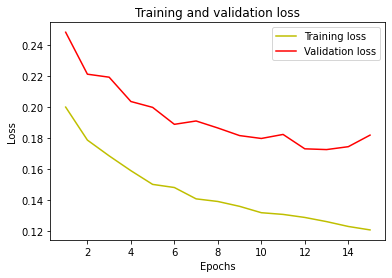

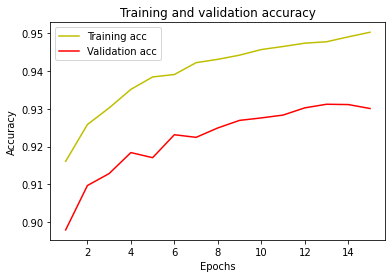

IoU socre is:  0.6407410795376584


In [ ]:
#If starting with pre-trained weights. 
#model.load_weights('/content/drive/MyDrive/tfkeras_unet/fibroblast.hdf5')
#model.load_weights('/content/drive/MyDrive/tfkeras_unet/fibroblastRAW.hdf5')
#model.load_weights('/content/drive/MyDrive/tfkeras_unet/fibroblastRAW32.hdf5')

history = model.fit(X_train, y_train,
                    batch_size = 32,
                    verbose=1,
                    epochs=15,
                    validation_data=(X_test, y_test),
                    shuffle=False)



#model.save('/content/drive/MyDrive/tfkeras_unet/fibroblast.hdf5') #processed images
#model.save('/content/drive/MyDrive/tfkeras_unet/fibroblastRAW.hdf5') #raw images
model.save('/content/drive/MyDrive/tfkeras_unet/fibroblastRAW32.hdf5')
#
############################################################
#Evaluate the model


	# evaluate model
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")


#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# acc = history.history['acc']
acc = history.history['accuracy']
# val_acc = history.history['val_acc']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

################################## intersection over union (IOU)
#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

intersection = np.logical_and(y_test, y_pred_thresholded)
union = np.logical_or(y_test, y_pred_thresholded)
iou_score = np.sum(intersection) / np.sum(union)
print("IoU socre is: ", iou_score)


0.0


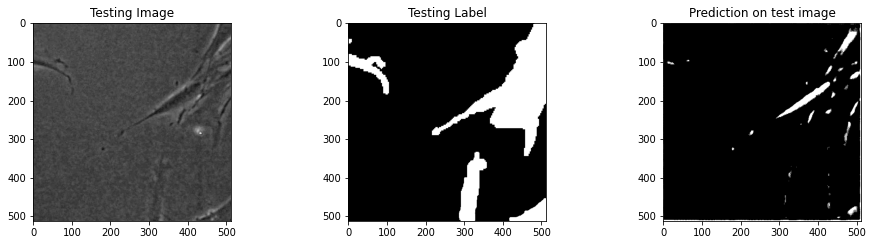

In [ ]:
#Predict on a few images
#model = get_model()
#model.load_weights('/content/drive/MyDrive/tfkeras_unet/fibroblast.hdf5') #Trained for 30 epochs processed images
#model.load_weights('/content/drive/MyDrive/tfkeras_unet/fibroblastRAW.hdf5')  #Trained for 30 epochs raw images
model.load_weights('/content/drive/MyDrive/tfkeras_unet/fibroblastRAW32.hdf5')


test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.2).astype(np.uint8)



plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

#test_img_other = cv2.imread(r'images/d1-b4-010.jpg', 0)
#test_img_other = cv2.imread('data/test_images/img8.tif', 0)
#test_img_other_norm = np.expand_dims(normalize(np.array(test_img_other), axis=1),2)
#test_img_other_norm=test_img_other_norm[:,:,0][:,:,None]
#test_img_other_input=np.expand_dims(test_img_other_norm, 0)


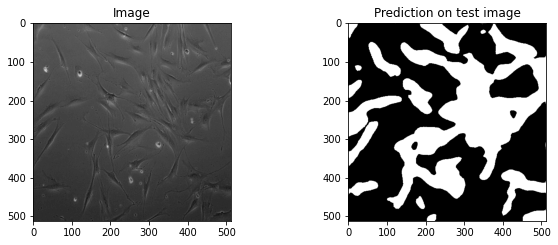

(512, 512)

In [ ]:

#model = get_model()
model.load_weights('/content/drive/MyDrive/tfkeras_unet/fibroblastRAW.hdf5')

test_img_other = cv2.imread(r'/content/drive/MyDrive/tfkeras_unet/d1-c3-002.jpg', 0)
#test_img_other = cv2.imread(r'/content/drive/MyDrive/tfkeras_unet/patches512-Redlabel/images/image__1_03.png', 0)
#test_img_other = cv2.imread(r'/content/drive/MyDrive/tfkeras_unet/fimage.jpg', 0)


test_img_other = cv2.resize(test_img_other, (512,512))


test_img_other_norm = np.expand_dims(normalize(np.array(test_img_other), axis=1),2)
test_img_other_norm=test_img_other_norm[:,:,0][:,:,None]
test_img_other_input=np.expand_dims(test_img_other_norm, 0)
prediction_other = (model.predict(test_img_other_input)[0,:,:,0] > 0.2).astype(np.uint8)



plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Image')
plt.imshow(test_img_other[:,:], cmap='gray')
plt.subplot(232)
plt.title('Prediction on test image')
plt.imshow(prediction_other, cmap='gray')
plt.show()

test_img_other.shape


CLAHE FILTER

(512, 512, 3)

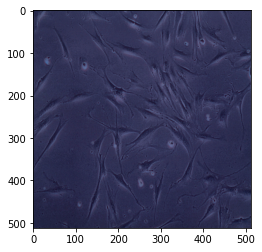

In [ ]:
img = cv2.imread("/content/drive/MyDrive/tfkeras_unet/d1-c3-002.jpg", 1)
plt.imshow(img)


#Convert image to LAB space (L:luminosity, A and B for color info)
lab_img= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)


#Split to L, A and B channels
l, a, b = cv2.split(lab_img)

#Plot the histogram 
#plt.hist(l.flat, bins=100, range=(0,255))


#Apply CLAHE to L channel
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
clahe_img = clahe.apply(l)


#Combine the CLAHE enhanced L-channel back with A and B channels
updated_lab_img2 = cv2.merge((clahe_img,a,b))

#Convert LAB image back to color (RGB)
CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)

CLAHE_img = cv2.resize(CLAHE_img, (512,512))

plt.imshow(CLAHE_img)

path = '/content/drive/MyDrive/tfkeras_unet'
cv2.imwrite(os.path.join(path , 'fimage.jpg'), CLAHE_img)

CLAHE_img.shape


MODEL

U-net model (imported from a seperate file)

In [ ]:
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

################################################################
def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = inputs

    #Encoder
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Decoder 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    # opt = Adam(learning_rate = 0.000001)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # model.summary()
    
    return model